# CS 524
HW3 Sparsh Agarwal 9075905142

Q1. Yes, a schedule where all 15 senior employees are able to meet the candidate is possible.

In [193]:
using JuMP, NamedArrays

availability =
  [ 0 0 1 1 0 0 0 1 1 0 0 0 0
    0 1 1 0 0 0 0 0 1 1 0 0 0
    0 0 0 1 1 0 1 1 0 1 1 1 1
    0 0 0 1 1 1 1 1 1 1 1 1 0
    0 0 0 0 0 0 1 1 1 0 0 0 0
    0 1 1 0 0 0 0 0 1 1 0 0 0
    0 0 0 1 1 1 1 0 0 0 0 0 0
    1 1 0 0 0 0 0 0 0 0 1 1 1
    1 1 1 0 0 0 0 0 0 1 1 0 0
    0 0 0 0 0 0 0 1 1 0 0 0 0
    0 0 0 0 0 0 1 1 1 0 0 0 0
    1 1 0 0 0 1 1 1 1 0 0 1 1
    1 1 1 0 1 1 0 0 0 0 0 1 1
    0 1 1 1 0 0 0 0 0 0 0 0 0
    1 1 0 0 1 1 0 0 0 0 0 0 0 ]

TIMES = ["10:00","10:20","10:40","11:00","11:20","11:40","lunch","1:00","1:20","1:40","2:00","2:20","2:40"]
NAMES = [:Manuel,:Luca,:Jule,:Michael,:Malte,:Chris,:Spyros,:Mirjam,:Matt,:Florian,:Josep,:Joel,:Tom,:Daniel,:Anne ]
times = NamedArray( availability, (NAMES,TIMES), ("NAME","TIME"))

15×13 Named Array{Int64,2}
NAME ╲ TIME │ 10:00  10:20  10:40  11:00  …   1:40   2:00   2:20   2:40
────────────┼──────────────────────────────────────────────────────────
:Manuel     │     0      0      1      1  …      0      0      0      0
:Luca       │     0      1      1      0         1      0      0      0
:Jule       │     0      0      0      1         1      1      1      1
:Michael    │     0      0      0      1         1      1      1      0
:Malte      │     0      0      0      0         0      0      0      0
:Chris      │     0      1      1      0         1      0      0      0
:Spyros     │     0      0      0      1         0      0      0      0
:Mirjam     │     1      1      0      0         0      1      1      1
:Matt       │     1      1      1      0         1      1      0      0
:Florian    │     0      0      0      0         0      0      0      0
:Josep      │     0      0      0      0         0      0      0      0
:Joel       │     1      1      0    

In [194]:
using JuMP, Clp, NamedArrays

indices_no_lunch = [1:6;8:13]

m = Model(solver=ClpSolver())
@variable(m, x[NAMES,TIMES] >= 0)

@constraint(m, constrA[j in TIMES[indices_no_lunch]], sum(x[i,j] * times[i,j] for i in NAMES) == 1 )
@constraint(m, sum(x[i,"lunch"] * times[i,"lunch"] for i in NAMES) == 3 )
@constraint(m, constrB[i in NAMES], sum(x[i,j] * times[i,j] for j in TIMES) >= 1 )
for i in NAMES
    for j in TIMES
         @constraint(m, x[i,j] <= times[i,j])
    end
end

@expression(m, num_int_per[i in NAMES], sum(x[i,j] for j in TIMES))
@expression(m, tot_int, sum(num_int_per[i] for i in NAMES))

@objective(m, Max, tot_int)  

status = solve(m)

println(getobjectivevalue(m))
# println(getvalue(x))

# for j in TIMES
#     for i in NAMES
#         println(getvalue(x[i,j]))
#     end
# end

# for i in NAMES
#     println(i)
# end

for j in TIMES
    print(j," : ")
    if j == "lunch"
        for i in NAMES
            if getvalue(x[i,j]) == 1.0
                print(i ," , ")
            end
        end
    else
        for i in NAMES
            if getvalue(x[i,j]) == 1.0
                print(i)
            end
        end
    end
    println("") 
end

# println(num_int_per[:Manuel])
# println(getvalue(x))        

15.0
10:00 : Matt
10:20 : Anne
10:40 : Daniel
11:00 : Manuel
11:20 : Jule
11:40 : Tom
lunch : Malte , Spyros , Josep , 
1:00 : Florian
1:20 : Luca
1:40 : Chris
2:00 : Mirjam
2:20 : Michael
2:40 : Joel


Q2. S site is the supplying destination and D Site is the destination site.

In [192]:
using JuMP, Clp, NamedArrays

coordinateX = [0 20 18 30 35 33 5 5 11 2]
coordinateY = [0 20 10 12 0 25 27 10 0 15]

sites = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

cost_per_mile = 0.50

supply = Dict(zip( sites, [0 7 0 0 3 0 0 4 6 0] ))
demand = Dict(zip( sites, [2 0 4 3 0 5 1 0 0 5] ))

distance = Array{Float64}(10,10)

for i in sites
    for j in sites
         distance[i,j]= 1.3*sqrt((coordinateX[i]-coordinateX[j])^2 + (coordinateY[i]-coordinateY[j])^2)
#         println( distance[i,j] )
    end
end

m = Model(solver=ClpSolver())

@variable(m, x[sites,sites] >= 0)       

@constraint(m, sup[i in sites], sum(x[i,j] for j in sites) == supply[i] )   # supply constraint
@constraint(m, dem[j in sites], sum(x[i,j] for i in sites) == demand[j] )   # demand constraint

@objective(m, Min, cost_per_mile*sum( x[i,j]*distance[i,j] for i in sites, j in sites ) ) # minimize transportation cost

status = solve(m)

println(status)

solution = NamedArray( Int[getvalue(x[i,j]) for i in sites, j in sites], (sites,sites), ("S Sites","D Sites") )
println( solution )
println()
println("Total cost will be \$", getobjectivevalue(m))


Optimal
10×10 Named Array{Int64,2}
S Sites ╲ D Sites │  1   2   3   4   5   6   7   8   9  10
──────────────────┼───────────────────────────────────────
1                 │  0   0   0   0   0   0   0   0   0   0
2                 │  0   0   1   0   0   5   1   0   0   0
3                 │  0   0   0   0   0   0   0   0   0   0
4                 │  0   0   0   0   0   0   0   0   0   0
5                 │  0   0   0   3   0   0   0   0   0   0
6                 │  0   0   0   0   0   0   0   0   0   0
7                 │  0   0   0   0   0   0   0   0   0   0
8                 │  0   0   0   0   0   0   0   0   0   4
9                 │  2   0   3   0   0   0   0   0   0   1
10                │  0   0   0   0   0   0   0   0   0   0

Total cost will be $152.63901632295628


Q3 # Data for stadium building problem

In [189]:
using JuMP

tasks = 1:18
durations = [2 16 9 8 10 6 2 2 9 5 3 2 1 7 4 3 9 1]
dur_dict = Dict(zip(tasks,durations));
predecessors = ( [], [1], [2], [2], [3], [4,5], [4], [6], [4,6], [4], [6], [9], [7], [2], [4,14], [8,11,14], [12], [17] )
pred_dict = Dict(zip(tasks,predecessors));   # dictionary mapping tasks --> predecessors.

# additional columns of data (maximum reduction possible )
max_reduction =  [0,  3,  1,  2,  2,  1, 1, 0,  2,  1,  1, 0, 0,  2,  2, 1,  3, 0]  # max reduction (in weeks)
cost_reduction = [0, 30, 26, 12, 17, 15, 8, 0, 42, 21, 18, 0, 0, 22, 12, 6, 16, 0]  # cost of reduction ($1,000/week)
bonus_amount = 30     # bonus for expediting the project ($1,000/week )
;

In [190]:
using JuMP,Clp
m = Model(solver=ClpSolver())

@variable(m, tstart[tasks] >= 0)

for i in tasks
    for j in pred_dict[i]
        @constraint(m, tstart[i] >= tstart[j] + dur_dict[j])
    end
end
@constraint(m, tstart[1] == 0)
@objective(m, Min, tstart[18] + dur_dict[18])     

solve(m)
println(getvalue(tstart))
println("minimum duration in weeks: ", getobjectivevalue(m))

tstart: 1 dimensions:
[ 1] = 0.0
[ 2] = 2.0
[ 3] = 18.0
[ 4] = 18.0
[ 5] = 27.0
[ 6] = 37.0
[ 7] = 26.0
[ 8] = 43.0
[ 9] = 43.0
[10] = 26.0
[11] = 43.0
[12] = 52.0
[13] = 28.0
[14] = 18.0
[15] = 26.0
[16] = 46.0
[17] = 54.0
[18] = 63.0
minimum duration in weeks: 64.0


In [191]:
using JuMP,Clp
m = Model(solver=ClpSolver())

@variable(m, tstart[tasks] >= 0)
@variable(m, tloss[tasks] >= 0)

@expression(m, total_loss, sum(cost_reduction[i]*tloss[i] for i in tasks))
@expression(m, finish_date, tstart[18] + dur_dict[18]) #as max reduction in last task is 0
@expression(m, extra_payment, (64-finish_date) * bonus_amount)
@expression(m, total_profit, ( extra_payment - total_loss))

for i in tasks
    for j in pred_dict[i]
        @constraint(m, tstart[i] >= tstart[j] + dur_dict[j] -  tloss[j])
        @constraint(m, tloss[j] <= max_reduction[j])
    end
end
@constraint(m, tstart[1] == 0)
@objective(m, Max, total_profit)    

solve(m)
println(getvalue(tstart))
println("New Finish Date in weeks: ",getvalue(tstart[18] + dur_dict[18])) #as max reduction in last task is 0
println("Extra payment in k: ", getvalue(extra_payment))
println("Total loss in k: ", getvalue(total_loss))
println("Total Profit in k: ", getobjectivevalue(m))

tstart: 1 dimensions:
[ 1] = 0.0
[ 2] = 2.0
[ 3] = 18.0
[ 4] = 18.0
[ 5] = 26.0
[ 6] = 34.0
[ 7] = 26.0
[ 8] = 39.0
[ 9] = 39.0
[10] = 26.0
[11] = 39.0
[12] = 48.0
[13] = 28.0
[14] = 18.0
[15] = 26.0
[16] = 42.0
[17] = 50.0
[18] = 56.0
New Finish Date in weeks: 57.0
Extra payment in k: 210.0
Total loss in k: 123.0
Total Profit in k: 87.0


Q4
   0.x + 1.y = 0
   3x - y = 1500
   2.x - 3.y = 300
   0.x + 1.y = 500
   1.x + 0.y = 0

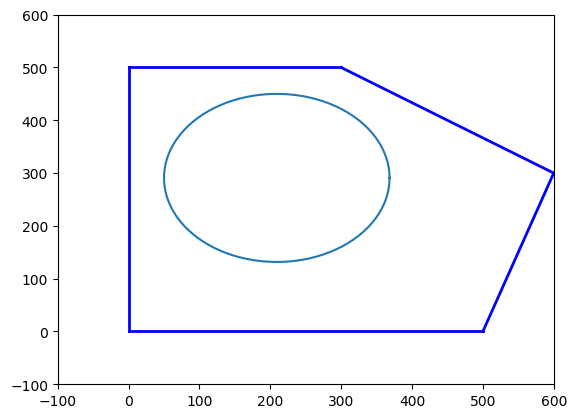

Optimal
The coordinates of the museum center are: [209.167, 290.833]
The largest possible radius is: 159.1673086804016


In [188]:
using JuMP, Clp
using PyPlot

A = [0 -1; 3 -1; 2 -3; 0 1; -1 0 ];
b = [0; 1500; 300; 500; 0]

m = Model(solver=ClpSolver())
@variable(m, r >= 0)           # radius
@variable(m, x[1:2])           # coordinates of center
for i = 1:size(A,1)
    @constraint(m, A[i,:]'*x + r*norm(A[i,:]) <= b[i])
end
@objective(m, Max, r)     # maximize radius

status = solve(m)
center = getvalue(x)
radius = getvalue(r) - 50 

#Deduction by 50: because when a circle is found in original polyhedron, 
#it would touch one of the sides which will be tangential to circle at 
#point of contact so to find a circle with a distance of 50 feet from each 
#side, just reduce the radius of circle by 50 as then that point of contact 
#of circle will be 50 feet away from the original side in a normal direction

rad = linspace(0, 2π, 100)
x = center[1] + radius*cos.(rad)
y = center[2] + radius*sin.(rad)
plot(x, y)

c = linspace(0,500,1000)
c1 = linspace(0,300,100)
c2 = linspace(500,600,100)
c3 = linspace(300,600,100)

w1 = 0*c
w2 = 500 + 0*c1
w3 = 3*(c2-500)
w4 = -(2/3)*(c3-300) + 500

plot(w1, c, "b", linewidth = 2)
hold 
plot(c, w1, "b", linewidth = 2)
hold 
plot(c1, w2, "b", linewidth = 2)
hold
plot(c2, w3, "b", linewidth = 2)
hold
plot(c3, w4, "b", linewidth = 2)

xlim((-100,600))
ylim((-100,600))

println(status)
println("The coordinates of the museum center are: ", center)
println("The largest possible radius is: ", radius)


